In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

## Libraries and Filesystem Setup

In [2]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import pickle
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
%matplotlib inline

[nltk_data] Downloading package punkt to /Users/dkarsann/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dkarsann/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### (already have imported / processed dataframe and stopwords)

## Parsing and Processing Content

In [3]:
df_en = pd.read_csv('../../processed_files/only_en.csv')
df_en.head()

DOMAIN                                        RAW_CONTENT  \
0               x10-hk.com  automation@home ¬ª ¬ª | | quick find categories ...   
1        hupshenghware.com  captcha powered by imunify360 english hupsheng...   
2       soponyonosnack.com  soponyonosnack.com currencies: rupiah language...   
3  theromanticvineyard.com  wine train (blogroll) | the romantic vineyard ...   
4         eopticians.co.uk  brands, base curve (bc): 8.4, base curve (bc):...   

  LANGUAGE  
0       en  
1       en  
2       en  
3       en  
4       en

### load stopword lists from MastersProjectStopwords.ipynb

In [4]:
common_stopwords = pickle.load(open("../../processed_files/common_stopwords.pickle", "rb"))
corpus_stopwords = pickle.load(open("../../processed_files/corpus_stopwords.pickle", "rb"))
combined_stopwords = pickle.load(open("../../processed_files/combined_stopwords.pickle", "rb"))
corpus_bigrams = pickle.load(open("../../processed_files/corpus_bigrams.pickle", "rb"))
corpus_trigrams = pickle.load(open("../../processed_files/corpus_trigrams.pickle", "rb"))

In [5]:
#corpus_bigrams

In [6]:
#corpus_trigrams

## Merging duplicate domain

In [5]:
df_merged = pd.DataFrame(df_en.groupby('DOMAIN')['RAW_CONTENT'].agg('sum')).reset_index()
df_merged.head()

DOMAIN                                        RAW_CONTENT
0    0-my.com       0-my.com related searches: related searches:
1  00bitz.com  error. page cannot be displayed. please contac...
2   01187.com  01187.com is available for purchase! - wwwv1.c...
3      027.ir  027.ir - dns4.ir 027.ir hits: 7,267 under cons...
4     03h.org  february | 2014 | online marketing review sear...

In [6]:
number_domain = df_merged['DOMAIN'].nunique()
number_domain

12975

In [7]:
df_merged.shape

(12975, 2)

In [8]:
with open('../../processed_files/df_merged.pickle', 'wb') as file:
    pickle.dump(df_merged, file)

## TEXT Processing

In [9]:
doc_length_list_orig = []
doc_length_list_no_digits = []
doc_length_list_no_tri = []
doc_length_list_no_bi = []
doc_length_list_tokenized = []
doc_length_list_no_stop = []
doc_length_list_stemmed = []

In [12]:
#digits

In [13]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
from nltk.corpus import stopwords 
stop_words = set(stopwords.words('english')) 
from nltk.stem import PorterStemmer
ps = PorterStemmer()
from string import digits
remove_digits = str.maketrans('', '', digits)
from IPython.display import display

def process(content):
    
    #--------original--------#
    doc_length_list_orig.append(len(content))
    
    #--------no digits--------#
    processed = content.translate(remove_digits)
    doc_length_list_no_digits.append(len(processed))
    
    #--------lower case--------#
    processed = processed.lower()
    
    # remove punctuation with translation table before trigram step
    
    #--------remove trigrams--------#
    for trigram in corpus_trigrams:
        processed = processed.replace(trigram.lower(), '')
    doc_length_list_no_tri.append(len(processed))

    #--------remove bigrams--------#
    for bigram in corpus_bigrams:
        processed = processed.replace(bigram.lower(), '') 
    doc_length_list_no_bi.append(len(processed))
    
    #--------tokenize--------#
    processed = tokenizer.tokenize(processed)
    doc_length_list_tokenized.append(len(' '.join(processed)))
    
    #--------remove stopwords--------#
    processed = [token for token in processed if token not in stop_words]
    doc_length_list_no_stop.append(len(' '.join(processed)))
    
    #--------stem tokens--------#
    processed = [ps.stem(token) for token in processed]
    doc_length_list_stemmed.append(len(' '.join(processed)))
    
    return processed

In [14]:
df_merged['RAW_CONTENT_PROCESSED'] = df_merged['RAW_CONTENT'].apply(lambda row: process(row))
df_merged.head()

DOMAIN                                        RAW_CONTENT  \
0    0-my.com       0-my.com related searches: related searches:   
1  00bitz.com  error. page cannot be displayed. please contac...   
2   01187.com  01187.com is available for purchase! - wwwv1.c...   
3      027.ir  027.ir - dns4.ir 027.ir hits: 7,267 under cons...   
4     03h.org  february | 2014 | online marketing review sear...   

                               RAW_CONTENT_PROCESSED  
0                [com, relat, search, relat, search]  
1  [error, page, cannot, display, pleas, contact,...  
2  [com, vailabl, purchas, wwwv, com, welcom, uun...  
3  [ir, dn, ir, ir, hit, construct, come, soon, h...  
4  [februari, onlin, market, review, search, rece...

In [15]:
df_merged['length'] = df_merged['RAW_CONTENT_PROCESSED'].apply(lambda row: len(row))
df_merged.head()

DOMAIN                                        RAW_CONTENT  \
0    0-my.com       0-my.com related searches: related searches:   
1  00bitz.com  error. page cannot be displayed. please contac...   
2   01187.com  01187.com is available for purchase! - wwwv1.c...   
3      027.ir  027.ir - dns4.ir 027.ir hits: 7,267 under cons...   
4     03h.org  february | 2014 | online marketing review sear...   

                               RAW_CONTENT_PROCESSED  length  
0                [com, relat, search, relat, search]       5  
1  [error, page, cannot, display, pleas, contact,...       9  
2  [com, vailabl, purchas, wwwv, com, welcom, uun...     140  
3  [ir, dn, ir, ir, hit, construct, come, soon, h...      25  
4  [februari, onlin, market, review, search, rece...     172

In [16]:
print('doc_length_list_orig: ', sum(doc_length_list_orig) / len(doc_length_list_orig))
print('doc_length_list_no_digits: ', sum(doc_length_list_no_digits) / len(doc_length_list_no_digits))
print('doc_length_list_no_tri average: ', sum(doc_length_list_no_tri) / len(doc_length_list_no_tri))
print('doc_length_list_no_bi: ', sum(doc_length_list_no_bi) / len(doc_length_list_no_bi))
print('doc_length_list_tokenized: ', sum(doc_length_list_tokenized) / len(doc_length_list_tokenized))
print('doc_length_list_no_stop: ', sum(doc_length_list_no_stop) / len(doc_length_list_no_stop))
print('doc_length_list_stemmed: ', sum(doc_length_list_stemmed) / len(doc_length_list_stemmed))

doc_length_list_orig:  5280.747437379576
doc_length_list_no_digits:  5152.000924855492
doc_length_list_no_tri average:  5087.480616570328
doc_length_list_no_bi:  4906.422504816956
doc_length_list_tokenized:  4659.20816955684
doc_length_list_no_stop:  3614.5058188824664
doc_length_list_stemmed:  3197.338342967245


In [17]:
doc_length_list_stemmed.sort()
doc_length_list_stemmed_filtered = [item for item in doc_length_list_stemmed if item > 0 and item < 200]
least_to_most_filtered_plot_items = []
for item in enumerate(doc_length_list_stemmed):
    least_to_most_filtered_plot_items.append(item)

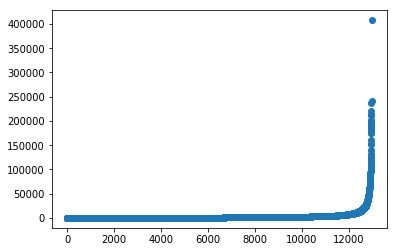

In [18]:
x, y = zip(*least_to_most_filtered_plot_items)
plt.scatter(x, y)
plt.show()

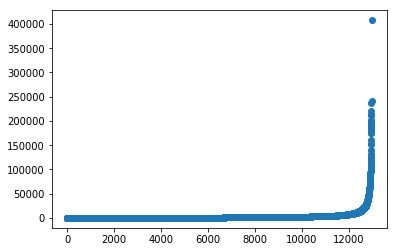

In [19]:
x, y = zip(*least_to_most_filtered_plot_items)
plt.scatter(x, y)
plt.show()

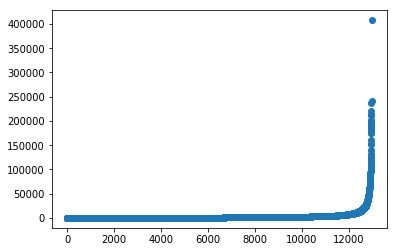

In [20]:
x, y = zip(*least_to_most_filtered_plot_items)
plt.scatter(x, y)
plt.show()

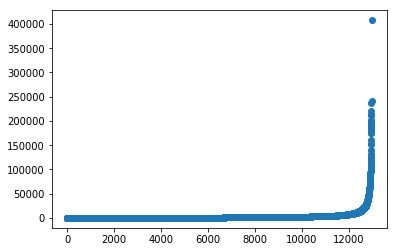

In [21]:
x, y = zip(*least_to_most_filtered_plot_items)
plt.scatter(x, y)
plt.show()

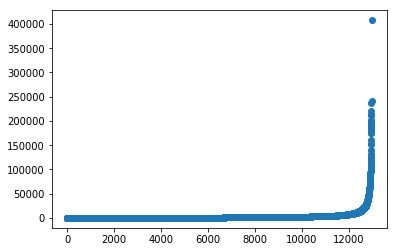

In [22]:
x, y = zip(*least_to_most_filtered_plot_items)
plt.scatter(x, y)
plt.show()

In [23]:
df_merged[df_merged['length'].between(90, 95)].style.set_properties(subset=['RAW_CONTENT'], **{'width-min': '100px'})

### 1 - doc_length_list_orig

In [24]:
doc_length_list_orig.sort()
least_to_most_plot_items = []
for item in enumerate(doc_length_list_orig):
    least_to_most_plot_items.append(item)

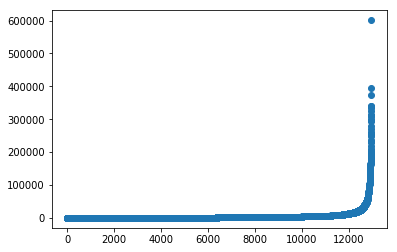

In [25]:
x, y = zip(*least_to_most_plot_items)
plt.scatter(x, y)
plt.show()

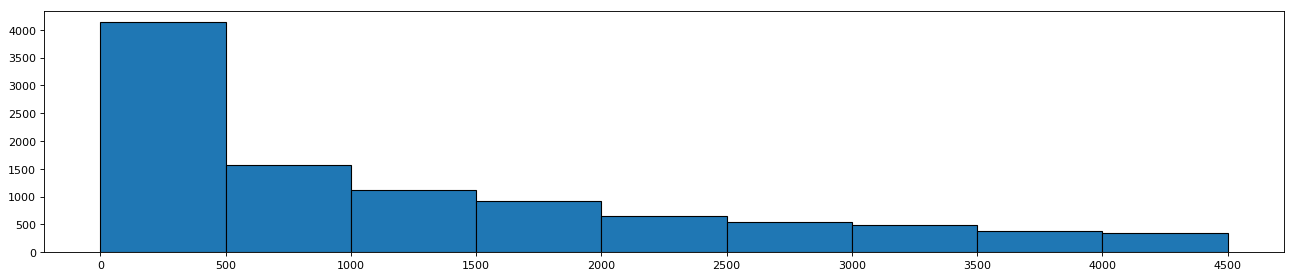

In [26]:
# bins = range(0, 10000, 1000)
bins = range(0, 5000, 500)
# bins = range(0, 1000, 100)
figure(figsize=(20, 4), dpi=80)
plt.hist(doc_length_list_orig, bins=bins, edgecolor="k")
plt.xticks(bins);

### 2 - doc_length_list_no_digits

In [67]:
#doc_length_list_no_digits.sort()
#least_to_most_plot_items = []
#for item in enumerate(doc_length_list_no_digits):
#    least_to_most_plot_items.append(item)

In [68]:
#x, y = zip(*least_to_most_plot_items)
#plt.scatter(x, y)
#plt.show()

In [66]:
# bins = range(0, 10000, 1000)
#bins = range(0, 5000, 500)
#figure(figsize=(20, 4), dpi=80)
#plt.hist(doc_length_list_no_digits, bins=bins, edgecolor="k")
#plt.xticks(bins);

### 3 - doc_length_list_no_tri

In [64]:
#doc_length_list_no_tri.sort()
#least_to_most_plot_items = []
#for item in enumerate(doc_length_list_no_tri):
#    least_to_most_plot_items.append(item)

In [65]:
#x, y = zip(*least_to_most_plot_items)
#plt.scatter(x, y)
#plt.show()

In [63]:
# bins = range(0, 10000, 1000)
#bins = range(0, 5000, 500)
#figure(figsize=(20, 4), dpi=80)
#plt.hist(doc_length_list_no_tri, bins=bins, edgecolor="k")
#plt.xticks(bins);

### 4 - doc_length_list_no_bi

In [62]:
#doc_length_list_no_bi.sort()
#least_to_most_plot_items = []
#for item in enumerate(doc_length_list_no_bi):
#    least_to_most_plot_items.append(item)

In [61]:
#x, y = zip(*least_to_most_plot_items)
#plt.scatter(x, y)
#plt.show()

In [60]:
# bins = range(0, 10000, 1000)
#bins = range(0, 5000, 500)
#figure(figsize=(20, 4), dpi=80)
#plt.hist(doc_length_list_no_bi, bins=bins, edgecolor="k")
#plt.xticks(bins);

### 5 - doc_length_list_tokenized

In [58]:
#doc_length_list_tokenized.sort()
#least_to_most_plot_items = []
#for item in enumerate(doc_length_list_tokenized):
#    least_to_most_plot_items.append(item)

In [59]:
#x, y = zip(*least_to_most_plot_items)
#plt.scatter(x, y)
#plt.show()

In [57]:
# bins = range(0, 10000, 1000)
#bins = range(0, 5000, 500)
#figure(figsize=(20, 4), dpi=80)
#plt.hist(doc_length_list_tokenized, bins=bins, edgecolor="k")
#plt.xticks(bins);

### 6 - doc_length_list_no_stop

In [56]:
#doc_length_list_tokenized.sort()
#least_to_most_plot_items = []
#for item in enumerate(doc_length_list_tokenized):
#    least_to_most_plot_items.append(item)

In [52]:
#x, y = zip(*least_to_most_plot_items)
#plt.scatter(x, y)
#plt.show()

In [55]:
# bins = range(0, 10000, 1000)
#bins = range(0, 5000, 500)
#figure(figsize=(20, 4), dpi=80)
#plt.hist(doc_length_list_tokenized, bins=bins, edgecolor="k")
#plt.xticks(bins);

### 7 - doc_length_list_stemmed

In [27]:
doc_length_list_stemmed.sort()
least_to_most_plot_items = []
for item in enumerate(doc_length_list_stemmed):
    least_to_most_plot_items.append(item)

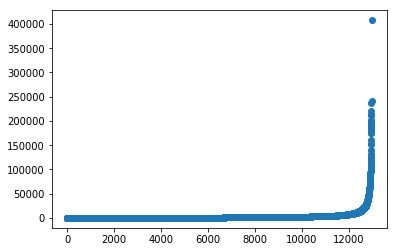

In [28]:
x, y = zip(*least_to_most_plot_items)
plt.scatter(x, y)
plt.show()

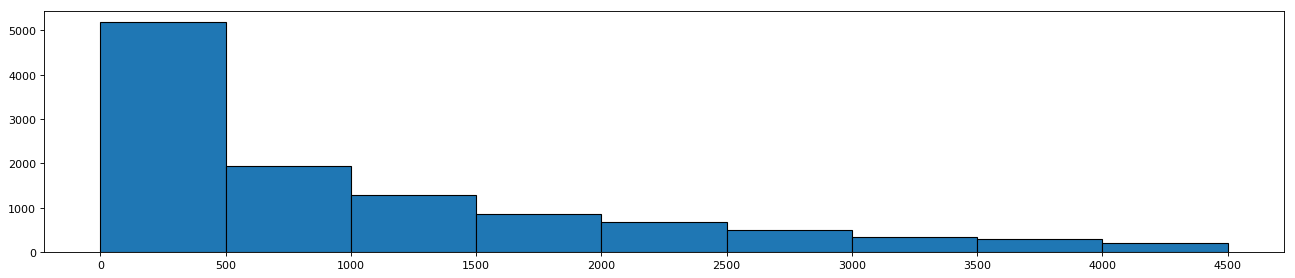

In [29]:
# bins = range(0, 10000, 1000)
bins = range(0, 5000, 500)
figure(figsize=(20, 4), dpi=80)
plt.hist(doc_length_list_stemmed, bins=bins, edgecolor="k")
plt.xticks(bins);